In [3]:
import datetime


In [5]:
print("Starting Langraph")
print(datetime.datetime.now())
print("2025-12-17 18:56:00.338205")

Starting Langraph
2025-12-17 18:56:20.705399
2025-12-17 18:56:00.338205


In [5]:
from langgraph.graph import StateGraph, START, END, state
from typing import TypedDict
from dotenv import load_dotenv
from langchain_ollama import ChatOllama

In [12]:
load_dotenv()

False

In [13]:
model = ChatOllama(
    model="llama3.2:latest"
)

In [14]:
#creating a state
class LLMState(TypedDict):
    question:str
    answer:str


In [15]:
def llm_qa(state: LLMState) -> LLMState:
    #extracting question from the state
    question = state["question"]

    #prompt sample format
    prompt = f"Answer the given question : {question}"

    #invoking model
    result = model.invoke(prompt).content

    #updating the state
    state['answer'] = result

    return state


In [16]:
# creating graph

graph = StateGraph(LLMState)

# adding node
graph.add_node('llm_qa', llm_qa)

# adding edges
graph.add_edge(START, "llm_qa")
graph.add_edge('llm_qa', END)

# compling
workflow = graph.compile()


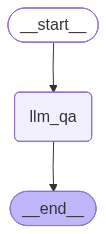

In [18]:
from IPython.display import  Image
Image(workflow.get_graph().draw_mermaid_png())

In [21]:
# executing
initial_state = {"question": "What is the temperature of core of SUN?"}
final_state = workflow.invoke(initial_state)

In [22]:
final_state

{'question': 'What is the temperature of core of SUN?',
 'answer': "The temperature at the core of the Sun is estimated to be around 15,000,000 degrees Celsius (27,000,000 degrees Fahrenheit). This is incredibly hot, and it's one of the highest temperatures found in any celestial body. The core of the Sun is so hot that it makes up about 25% of its total radius, despite occupying only a tiny fraction of its overall size."}

In [23]:
print(final_state['answer'])

The temperature at the core of the Sun is estimated to be around 15,000,000 degrees Celsius (27,000,000 degrees Fahrenheit). This is incredibly hot, and it's one of the highest temperatures found in any celestial body. The core of the Sun is so hot that it makes up about 25% of its total radius, despite occupying only a tiny fraction of its overall size.
